In [4]:
%matplotlib inline

In [9]:
import json
from matplotlib import pyplot as plt
import numpy as np

In [8]:
_ = lambda ds: [(tuple(x[0]), x[1]) for x in ds]

results = [
    "results-1.5-superlu.json",
    "results-1.5-umfpack.json",
    "results-1.5-pardiso.json",  
    "results-1.6-pardiso.json",
]

data = [dict(_(json.load(open(fp)))) for fp in results]
keys = set(data[0])

In [10]:
results = np.zeros((len(keys), 4))

for index, key in enumerate(keys):
    results[index, :] = tuple([o[key] for o in data])

In [11]:
xs = np.arange(4)

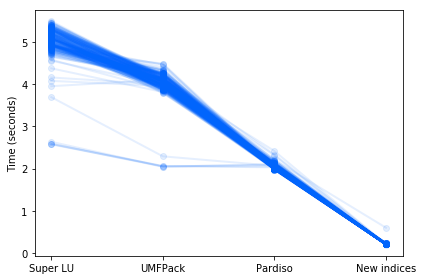

In [26]:
plt.figure(figsize=(6, 4))

for i in range(250):
    plt.plot(xs, results[i, :], '#0165fc', lw=2, alpha=0.1, marker='o')

plt.ylabel("Time (seconds)")
plt.xticks([0, 1, 2, 3], ["Super LU", "UMFPack", "Pardiso", "New indices"])

plt.tight_layout()
plt.savefig("performance-increases.png", dpi=200)